# Lab 04 assignment notebook 1 (20 pts)
*Notebook 1 of 2*

UW Geospatial Data Analysis  
CEE467/CEWA567  
David Shean, Eric Gagliano, Quinn Brencher

## Introduction

This lab focuses on solidifying your understanding of fundamental raster concepts. You will...
* inspect, read, and write raster data
* understand raster attributes
* perform quantitative analysis such as band math operations and thresholding
* practice different raster visualization approaches

### *Instructions*
1. Please go through all cells in the notebook sequentially, making sure to complete all instructions
2. Some answers are left in as a guide--you still need to fill in the code to produce the output on your own!
3. Answers should be produced using code unless otherwise noted by "Written response"
4. Follow submission instructions closely, making sure you save and submit your notebook with all your outputs preserved

## Part 0: Imports and filenames
### First, let's import the libraries we'll need.

In [1]:
import geopandas as gpd
import rasterio as rio
import rioxarray as rxr
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from pathlib import Path
import os
import pyproj
import numpy as np

In [2]:
#May want to use interactive plotting for zoom/pan and live coordinate display
#%matplotlib widget
%matplotlib inline

### Let's make sure our files are where we think they are!
If you haven't downloaded the files already, please run the download demo notebook.

In [3]:
imgdir = f'{Path.home()}/gda_demo_data/LS8_data'

In [4]:
!ls -lh $imgdir

total 1.3G
-rw-r--r-- 1 eric eric 1.2M Jan 26 11:31 LC08_L2SP_046027_20180818_02_T1_rendered_preview.png
-rw-r--r-- 1 eric eric  81M Jan 26 11:27 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B1.TIF
-rw-r--r-- 1 eric eric  81M Jan 26 11:28 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B2.TIF
-rw-r--r-- 1 eric eric  82M Jan 26 11:28 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B3.TIF
-rw-r--r-- 1 eric eric  83M Jan 26 11:29 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B4.TIF
-rw-r--r-- 1 eric eric  92M Jan 26 11:29 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B5.TIF
-rw-r--r-- 1 eric eric  90M Jan 26 11:30 LC08_L2SP_046027_20180818_20200831_02_T1_SR_B6.TIF
-rw-r--r-- 1 eric eric  84M Jan 26 11:31 LC08_L2SP_046027_20180818_20200831_02_T1_ST_B10.TIF
-rw-r--r-- 1 eric eric 115M Jan 27 19:39 LC08_L2SP_046027_20180818_20200831_02_T1_ST_B10_4326.TIF
-rw-r--r-- 1 eric eric 1.5M Jan 26 11:27 LC08_L2SP_046027_20181224_02_T1_rendered_preview.png
-rw-r--r-- 1 eric eric  91M Jan 26 11:23 LC08_L2SP_046027_

### Let's assign band filenames to variables

In [5]:
#Pre-identified cloud-free Image IDs used for the lab
august_id = 'LC08_L2SP_046027_20180818_20200831_02_T1' # August 2018
december_id = 'LC08_L2SP_046027_20181224_20200829_02_T1' # # December 2018

We've done the thermal infrared, shortwave infrared, and near infrared for you.

In [6]:
# B10 is the thermal infrared /surface temperture band
tir_august_fn = os.path.join(imgdir, august_id+'_ST_B10.TIF')
tir_december_fn = os.path.join(imgdir, december_id+'_ST_B10.TIF')

swir_august_fn = os.path.join(imgdir, august_id+'_SR_B6.TIF')
swir_december_fn = os.path.join(imgdir, december_id+'_SR_B6.TIF')

nir_august_fn = os.path.join(imgdir, august_id+'_SR_B5.TIF')
nir_december_fn = os.path.join(imgdir, december_id+'_SR_B5.TIF')

#### *Please add variables for red, green, and blue each of the two images.*
If you're unsure of which filename corresponds to each band, check the chart in the download demo notebook.

In [7]:
# STUDENT CODE HERE

#### *Written response: Use `gdalinfo` to inspect the blue band from the december image, and report which CRS this image is in.* 

In [8]:
# STUDENT CODE HERE

**STUDENT WRITTEN RESPONSE HERE**

## Part 1: Raster basics (2 pts)

### Before we switch to rioxarray for the remainder of the lab, let's briefly open and read in the near infrared band from the August 2018 image with rasterio.

In [9]:
nir_august_src = rio.open(nir_august_fn)
nir_august_src.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 7771, 'height': 7891, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 10N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-123],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32610"]]'), 'transform': Affine(30.0, 0.0, 473685.0,
       0.0, -30.0, 5373615.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

#### *Written response: Based on this inspection of the metadata, how do you think missing values are represented?* 

**STUDENT WRITTEN RESPONSE HERE**

#### Unmasked...

In [10]:
nir_august_ar = nir_august_src.read(1)
nir_august_ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

#### Masked...

In [11]:
nir_august_ma = nir_august_src.read(1,masked=True)
nir_august_ma

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=0,
  dtype=uint16)

In [12]:
print(f'Unmasked array dtype: {nir_august_ar.dtype}, nodata value: {int(nir_august_src.profile["nodata"])}, size: {nir_august_ar.nbytes/1e6:.2f} MB')
print('-----------------------------------------------------------------------------------')
print(f'Masked array (just the data array) dtype: {nir_august_ma.dtype}, nodata value: {nir_august_ma.fill_value}, size: {nir_august_ma.nbytes/1e6:.2f} MB')
print(f'Accompanying mask dtype: {nir_august_ma.mask.dtype}, size: {nir_august_ma.mask.nbytes/1e6:.2f} MB')
print(f'Combined masked array (data array+mask) size: {(nir_august_ma.nbytes/1e6 + nir_august_ma.mask.nbytes/1e6):.2f} MB')


Unmasked array dtype: uint16, nodata value: 0, size: 122.64 MB
-----------------------------------------------------------------------------------
Masked array (just the data array) dtype: uint16, nodata value: 0, size: 122.64 MB
Accompanying mask dtype: bool, size: 61.32 MB
Combined masked array (data array+mask) size: 183.96 MB


#### *Written response: Compare the amount of memory the unmasked array takes up in memory vs how much memory the respective file takes up on the disk (see `!ls -lh $imgdir` output above). Why might these be different?*

**STUDENT WRITTEN RESPONSE HERE**

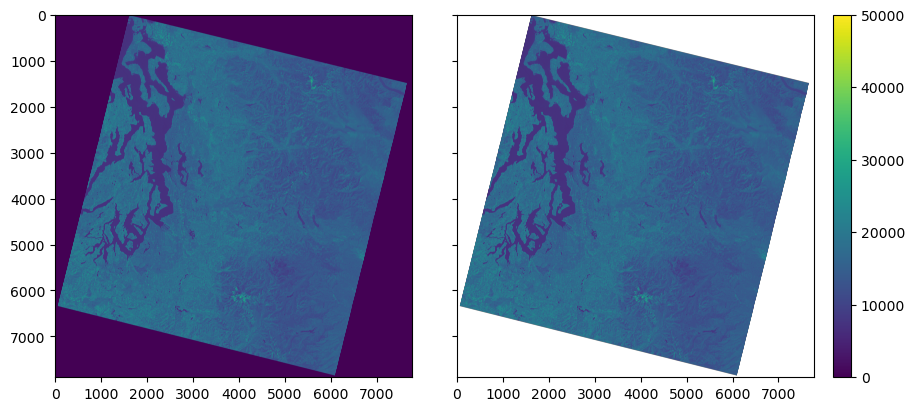

In [13]:
f,axs=plt.subplots(1,2, figsize=(9,4),sharey=True, layout='constrained')

axs[0].imshow(nir_august_ar,vmin=0,vmax=50000)
im = axs[1].imshow(nir_august_ma,vmin=0,vmax=50000)

f.colorbar(im)

In [14]:
nir_august_src.close()
nir_august_ar = None
nir_august_ma = None

#### *Written response: What differences did you notice between the unmasked and masked ouputs and plots? Do the dark purple regions in the unmasked array reflect real values?*

**STUDENT WRITTEN RESPONSE HERE**

### Now we'll do the same thing, but using rioxarray...

In [15]:
nir_august_unmasked_da = rxr.open_rasterio(nir_august_fn).squeeze()
nir_august_unmasked_da

<xarray.DataArray (y: 7891, x: 7771)> Size: 123MB
[61320961 values with dtype=uint16]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 62kB 4.737e+05 4.737e+05 ... 7.068e+05 7.068e+05
  * y            (y) float64 63kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

In [16]:
nir_august_da = rxr.open_rasterio(nir_august_fn,masked=True).squeeze()
nir_august_da

<xarray.DataArray (y: 7891, x: 7771)> Size: 245MB
[61320961 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 62kB 4.737e+05 4.737e+05 ... 7.068e+05 7.068e+05
  * y            (y) float64 63kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [17]:
print(f'Unmasked xarray DataArray dtype: {nir_august_unmasked_da.dtype}, nodata value: {nir_august_unmasked_da.rio.nodata}, size: {nir_august_unmasked_da.nbytes/1e6:.2f} MB')
print(f'Masked xarray DataArray dtype: {nir_august_da.dtype}, nodata value: {nir_august_da.rio.nodata}, size: {nir_august_da.nbytes/1e6:.2f} MB')


Unmasked xarray DataArray dtype: uint16, nodata value: 0, size: 122.64 MB
Masked xarray DataArray dtype: float32, nodata value: nan, size: 245.28 MB


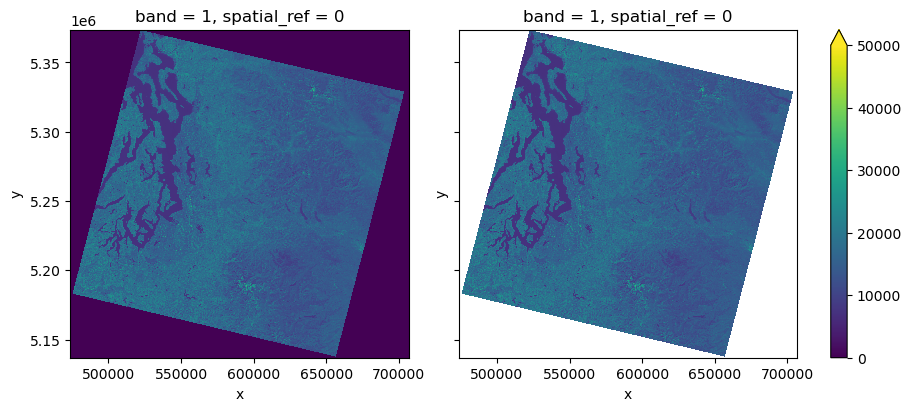

In [18]:
f,axs=plt.subplots(1,2, figsize=(9,4),sharey=True, layout='constrained')

nir_august_unmasked_da.plot.imshow(ax=axs[0],vmin=0,vmax=50000,add_colorbar=False)
nir_august_da.plot.imshow(ax=axs[1],vmin=0,vmax=50000)

In [19]:
nir_august_unmasked_da = None

#### *Written response: Based on your observations, describe how rasterio and rioxarray handle masking differently. Based on only this insight, give an example of a case in which you might prefer to use rasterio over rioxarray.*
Hint: think about dtype

**STUDENT WRITTEN RESPONSE HERE**

### Let's proceed with using rioxarray for the remainder of the lab. We can use the `rio` accessor on an xarray DataArray (or Dataset) once we've imported rioxarray. The `rio` accessor allows us to use rioxarray's functionalities. You can check out a list of rioxarray's functions and the properties you can access from the `rio` accessor [here](https://corteva.github.io/rioxarray/stable/modules.html). 

#### *Inspect and print the following raster metadata using the xarray `rio` accessor... shape, height, width, nodata value, encoded nodata value, number of bands, CRS, resolution, extent, and transform. Try to print things neatly if you can using f strings.*

In [20]:
nir_august_da

<xarray.DataArray (y: 7891, x: 7771)> Size: 245MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 62kB 4.737e+05 4.737e+05 ... 7.068e+05 7.068e+05
  * y            (y) float64 63kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [21]:
# some examples...
# # nir_august_da.rio.shape
# nir_august_da.rio.crs

In [22]:
# STUDENT CODE HERE

Raster shape: (7891, 7771)
Raster height: 7891
Raster width: 7771
Raster nodata value: nan
Raster encoded nodata value: 0.0
Raster number of bands: 1
Raster CRS: EPSG:32610
Raster resolution: (30.0, -30.0)
Raster extent: (473685.0, 5136885.0, 706815.0, 5373615.0)
Raster transform: 
| 30.00, 0.00, 473685.00|
| 0.00,-30.00, 5373615.00|
| 0.00, 0.00, 1.00|


#### *What is the value of the right bound?*  
Hint: The `.rio.bounds()` method returns a tuple with bounds formatted (left, bottom, right, top)

In [23]:
# STUDENT CODE HERE

#### *Written response: Inspect the `'spatial_ref'` coordinate either by clicking the show/hide attributes button on the DataArray output above or by indexing into the DataArray like `nir_august_da['spatial_ref']`. What do you think spatial_ref is? What is the longitude of central meridian value, and what does that mean?*

**STUDENT WRITTEN RESPONSE HERE**

In [24]:
nir_august_da = None

### Now we'll open the red band for August with rioxarray, using `masked=True` and `overview_level=2`. 

In [25]:
red_august_da = rxr.open_rasterio(red_august_fn,masked=True,overview_level=2).squeeze()
red_august_da

<xarray.DataArray (y: 987, x: 972)> Size: 4MB
[959364 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB 4.738e+05 4.74e+05 ... 7.065e+05 7.067e+05
  * y            (y) float64 8kB 5.373e+06 5.373e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

#### *Written response: What did setting `overview_level=2` do?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Make a figure with two subplots. On the left, plot the raster using the underlying numpy array. On the right, plot the raster using xarray DataArray's built in `.plot.imshow()` functionality. Use a gray colormap with the same vmin and vmax for both, and please include a title on each.* 
Hint: Remember, we can access an xarray DataArray's underlying numpy array with `.values`

In [26]:
# STUDENT CODE HERE

<img src="imgs/red_band_pixel_and_projected_coords.png" width="1000">

In [27]:
red_august_da = None

#### *Written response: Why does the Landsat-8 image appear rotated relative to the axes?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Written response: What is different about the two axes? We know the dimensions of the two arrays are the same, so what does this tell us about xarray DataArray coordinates? Feel free to inspect the xarray DataArray for clues.*
Hint: Think about pixel coordinates and projected coordinates

**STUDENT WRITTEN RESPONSE HERE**

## Part 2: Converting to geophysical variables (3 pts)
The values we've seen so far do not reflect geophysical variables! In order to convert from the digital number (DN) representation to surface reflectance (unitless 0.0-1.0) or surface temperature (K), we have to multiply by a scale factor and add an offset. Check out the download demo for more details.

### First, let's open the thermal infrared band with `masked=False` and `overview=0`...

In [28]:
tir_august_da = rxr.open_rasterio(tir_august_fn,masked=False,overview_level=0).squeeze()
tir_august_da

<xarray.DataArray (y: 3946, x: 3886)> Size: 31MB
[15334156 values with dtype=uint16]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 31kB 4.737e+05 4.738e+05 ... 7.067e+05 7.068e+05
  * y            (y) float64 32kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0

#### *Make a figure with a plot of the thermal infrared image on the left, and its corresponding histogram on the right.*
Hint: You can create a histogram with the xarray DataArray's built-in `.plot.hist()`

In [29]:
# STUDENT CODE HERE

<img src="imgs/tir_band_pixel_values_and_histogram.png" width="1000">

#### *Written response: Why do you see a spike at 0 in the histogram?*

**STUDENT WRITTEN RESPONSE HERE**

#### *Try making the previous figure again, this time loading with `masked=True`*

In [30]:
# STUDENT CODE HERE

In [31]:
# STUDENT CODE HERE

<img src="imgs/tir_band_pixel_values_and_histogram_2.png" width="1000">

### *These values still don't look very interpretable. Let's convert them to degrees C.*
Hint: ST stands for surface temperature and SR stands for surface reflectance. Once you convert ST, be mindful this will be in degrees Kelvin. For better interpretability, please convert this to degrees Celsius.

In [32]:
#These are the standard scale and offset values
#SR 0.0000275 + -0.2
sr_scale = 0.0000275
sr_offset = -0.2
#ST 0.00341802 + 149.0
st_scale = 0.00341802
st_offset = 149.0

In [33]:
# STUDENT CODE HERE

<xarray.DataArray (y: 3946, x: 3886)> Size: 61MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 31kB 4.737e+05 4.738e+05 ... 7.067e+05 7.068e+05
  * y            (y) float64 32kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0

#### *Calculate the min and max surface temperature values, and the 2nd and 98th percentile of surface temperature values.*
Hint: You can use numpy functions on your xarray DataArray or the underlying numpy array. You can also use built-in xarray DataArray methods. Check out the `np.nanpercentile` or the built-in xarray DatArray `.quantile` method.

In [34]:
# STUDENT CODE HERE

Minimum temperature: -1.16°C
Maximum temperature: 99.85°C


In [35]:
# STUDENT CODE HERE

2nd percentile: 15.29°C
98th percentile: 39.24°C


#### *Written response: We loaded this surface temperature raster in using its first overview (`overview_level=0`), effictively making the image coarser by a factor of two. Do you think the minimum, maximum, and percentile surface temperature values we calculated are the same as they would be in the full resolution image? How might this inform your future use of overviews?*

**STUDENT WRITTEN RESPONSE HERE**

#### *With your updated surface temperature values, please make a final figure with pixel values on the left and the histogram on the right. Try using the `inferno` colormap, and set `vmin=0` and `vmax=40`. Please also draw vertical lines for the 2nd and 98th percentile on the histogram.*

In [36]:
# STUDENT CODE HERE

<img src="imgs/tir_band_pixel_values_and_histogram_3.png" width="1000">

#### *Written response: Do the values make sense for August? Based on your image, where are the temperatures generally warmest? Coldest?*

**STUDENT WRITTEN RESPONSE HERE**

## Part 3: Raster transform (2 pts)

#### *Written response: Inspect the transform property. In your own words, what does this represent? How would it be used mathematically?*

In [37]:
transform = tir_august_da.rio.transform()
transform

Affine(59.99227997941328, 0.0, 473685.0,
       0.0, -59.99239736441966, 5373615.0)

**STUDENT WRITTEN RESPONSE HERE**

#### *Use the transform to convert the raster's corner pixel coordinates to projected coordinates.*
Hint: After you calculate the projected coordinates of the corners, try using `.rio.bounds()` to see if your answer make sense in the context of this raster's bounds

In [38]:
upper_left_pixel = (0,0)
lower_left_pixel = (0,tir_august_da.rio.height)
upper_right_pixel = (tir_august_da.rio.width,0)
lower_right_pixel = (tir_august_da.rio.width,tir_august_da.rio.height)

print(f'Upper left pixel: {upper_left_pixel}')
print(f'Lower left pixel: {lower_left_pixel}')
print(f'Upper right pixel: {upper_right_pixel}')
print(f'Lower right pixel: {lower_right_pixel}')

Upper left pixel: (0, 0)
Lower left pixel: (0, 3946)
Upper right pixel: (3886, 0)
Lower right pixel: (3886, 3946)


In [39]:
# STUDENT CODE HERE

Upper left projected: (473685.0, 5373615.0)
Lower left projected: (473685.0, 5136885.0)
Upper right projected: (706815.0, 5373615.0)
Lower right projected: (706815.0, 5136885.0)


In [40]:
# STUDENT CODE HERE

(473685.0, 5136885.0, 706815.0, 5373615.0)

#### *Use the corner projected coordinates to compute the total dimensions of the raster in **km**.*
Print your answer with an f string with a format similar to *Total height: height km, total width: width km*

In [41]:
# STUDENT CODE HERE

## Part 4: Raster windows (1 pts)

Often times we only want to work with or view a small subset of a raster. This is helpful for many reasons, but will be especially helpful for us because a smaller raster will take up less RAM, and we are quite memory constrained on the jupyterhub. Using a smaller subset of the data is also great practice for prototyping new workflows, and makes analysis of larger-than-memory datasets possible.

In a pre-rioxarray world, you often had two choices for selecting subsets of data in python. If your raster was a numpy array, you could use simple array slicing to select a window, but that required reading in the entire numpy array beforehand. Rasterio's `rasterio.windows.Window` functionality allowed for [windowed reading](https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html) of rasters, only loading into memory the portion of the raster you were interested in. All you have to do is pass a window object while reading, like `src.read(band, window=window, masked=True)`. If you use rasterio, windowed reads are the way to go--check out the rasterio demo notebook for an example. 

However, rioxarray (and xarray more broadly) does what's called a "lazy load". There's some nuance here, especially as it relates to similar concepts we'll explore with a package called `dask` in later modules, but we'll skip most of the complexity for now. At its simplist, lazy loading allows us to view and interact with the metadata of a raster without the full data being loaded into memory.

Lazy loading, along with xarray's intuitive `.sel` and `.isel` selection methods, will enable us to get the benefits of windowed reads with greater flexibility and more intuitive syntax.

To select a window in projected coordinates (coordinate labels), use:  

`da.sel(x=slice(x_min,x_max),y=slice(y_max,y_min))` 

and for pixel coordinates (integer array indicies), use: 

`da.isel(x=slice(x_min,x_max),y=slice(y_min,y_max))`    

notice how the slicing flips for y due to pixel coordinates increasing from the top of the raster to the bottom of the raster.

### Let's try extracting a window around Mt. Rainier using both methods
This time we'll open the thermal infrared image again, with masking, but the full resolution raster

In [42]:
tir_august_da = rxr.open_rasterio(tir_august_fn,masked=True).squeeze()
tir_august_da

<xarray.DataArray (y: 7891, x: 7771)> Size: 245MB
[61320961 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 62kB 4.737e+05 4.737e+05 ... 7.068e+05 7.068e+05
  * y            (y) float64 63kB 5.374e+06 5.374e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

#### *Use `.sel()` and `.isel()` to select a window around Mt. Rainier. Convert to surface temperature in degrees C, and then plot these next to each other.*
Hint: For the window, you can use [581685.0, 5174895.0, 612405.0, 5205615.0] for projected coordinates, and [3600, 6624, 4624, 5600] for pixel coordinates. Remember when y slicing is reversed :)

In [43]:
# STUDENT CODE HERE

<xarray.DataArray (y: 1024, x: 1024)> Size: 4MB
[1048576 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB 5.817e+05 5.817e+05 ... 6.124e+05 6.124e+05
  * y            (y) float64 8kB 5.206e+06 5.206e+06 ... 5.175e+06 5.175e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [44]:
# STUDENT CODE HERE

<xarray.DataArray (y: 1024, x: 1024)> Size: 4MB
[1048576 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 8kB 5.817e+05 5.817e+05 ... 6.124e+05 6.124e+05
  * y            (y) float64 8kB 5.206e+06 5.206e+06 ... 5.175e+06 5.175e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [45]:
tir_august_subset_geo_da = st_scale*tir_august_subset_geo_da+st_offset
tir_august_subset_geo_da = tir_august_subset_geo_da-273.15


tir_august_subset_pix_da = st_scale*tir_august_subset_pix_da+st_offset
tir_august_subset_pix_da = tir_august_subset_pix_da-273.15

In [46]:
# STUDENT CODE HERE

<img src="imgs/tir_band_pixel_vs_projected_coords.png" width="1000">

In [47]:
tir_august_subset_pix_da = None
tir_august_subset_da = tir_august_subset_geo_da
tir_august_subset_geo_da = None

## Part 5: Raster sampling (1 pts)

Previously, rasterio users would have to use `src.xy` and `src.index` to convert between pixel and projected coordinates. They would either need to convert to pixel coordinates to index into the numpy array, or they would have to use `src.sample`. 

Rioxarray's (xarray's) `.sel()` and `.isel()` functionalities can be really helpful for raster sampling as well. Since `.isel()` selects based integer array coordinates, you can enter in pixel coordinates. `.sel()` selects based on coordinate labels, so you can enter projected coordinates. When selecting projected coordinates which are often float values, we'll use `method='nearest'` since we likely won't know the exact coordinate discretization.

To select a point based on projected coordinates:  

`da.sel(x=x_coord,y=y_coord,method="nearest")` 

and for pixel coordinates: 

`da.isel(x=x_coord,y=y_coord)` 


#### *Given the following points to sample, print the surface temperature value at that point. Note that the first two points are in the projected coordinates, the third point is in pixel coordinates, and the fourth point is in latitude and longitude.*

Hint: We've defined a Transformer for you to convert the 4th point's latitude and longitude to a point in this CRS. See the sampling section of the rioxarray demo for more help.

In [48]:
glacier_proj_point = (595949,5190623)
sun_facing_proj_point = (600000,5195620)
shaded_pixel_point = (539,264)
parking_lot_latlon_point = (-121.7354,46.7856)

transform_4326_point_to_raster_crs = pyproj.Transformer.from_crs("EPSG:4326",tir_august_subset_da.rio.crs,always_xy=True)

In [49]:
# STUDENT CODE HERE

In [50]:
print(f'Glacier pixel temperature: {glacier_value:.2f}°C')
print(f'Sun-facing pixel temperature: {sun_facing_value:.2f}°C')
print(f'Shaded pixel temperature: {shaded_pixel_value:.2f}°C')
print(f'Paradise parking lot pixel temperature: {parking_lot_value:.2f}°C')

Glacier pixel temperature: 0.83°C
Sun-facing pixel temperature: 41.75°C
Shaded pixel temperature: 18.97°C
Paradise parking lot pixel temperature: 32.61°C


#### *Challenge question: Plot the four points on top of the surface temperature raster and add a scalebar* (GS: Attempt required / UG: +1 pts)
Hint: You will likely have to transform the shaded pixel point and parking lot point before plotting

In [51]:
# STUDENT CODE HERE

<img src="imgs/tir_band_points_of_interest.png" width="1000">


#### *Written response: Do the temperatures seem reasonable for their respective locations?*

**STUDENT WRITTEN RESPONSE HERE**

## Great work, you finished notebook 1! Move on to Notebook #2, but first... 
* Save this notebook! 
    * You can also do an add, commit, and push at this stage
* **Shut down the kernel to free RAM**
* Proceed to Notebook #2!